In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
games_stats = pd.read_csv('https://raw.githubusercontent.com/skunichetty/cfb-f21/main/data/game_stats.csv')
games = pd.read_csv('https://raw.githubusercontent.com/skunichetty/cfb-f21/main/data/games.csv')


In [18]:
games

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index,highlights,notes
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,0.448322,2439,UNLV,Mountain West,23.0,"[6, 7, 3, 7]",0.551678,5.598996,NaN,NaN
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,0.999811,282,Indiana State,NaN,35.0,"[7, 14, 7, 7]",0.000189,2.046742,NaN,NaN
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,0.962311,2711,Western Michigan,Mid-American,13.0,"[0, 7, 0, 6]",0.037689,4.867190,NaN,NaN
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,0.995635,2509,Purdue,Big Ten,7.0,"[0, 7, 0, 0]",0.004365,2.774517,NaN,NaN
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,0.981694,113,UMass,Mid-American,0.0,"[0, 0, 0, 0]",0.018306,1.924321,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,401282794,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3953.0,...,NaN,275,Wisconsin,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
898,401282785,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3936.0,...,NaN,213,Penn State,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
899,401282766,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,6577.0,...,NaN,120,Maryland,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
900,401282753,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3907.0,...,NaN,84,Indiana,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
games_stats

,id,home.rushingTDs,home.passingTDs,home.kickReturnYards,home.kickReturnTDs,home.kickReturns,home.kickingPoints,home.interceptionYards,home.interceptionTDs,home.passesIntercepted,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,401012867,0,1,13.0,0.0,1.0,11.0,13.0,0.0,1.0,...,3.0,6-46,2,1,1,19:05,NaN,NaN,NaN,NaN
1,401012810,4,3,14.0,0.0,1.0,7.0,32.0,0.0,3.0,...,5.8,3-25,5,2,3,22:08,15.0,0.0,1.0,8.0
2,401012884,0,1,28.0,0.0,2.0,1.0,NaN,NaN,NaN,...,3.5,9-99,2,2,0,40:58,17.0,0.0,2.0,3.0
3,401012857,3,1,19.0,0.0,1.0,4.0,1.0,0.0,1.0,...,4.8,3-40,1,0,1,26:02,10.0,0.0,3.0,9.0
4,401013332,4,3,32.0,0.0,2.0,9.0,0.0,0.0,1.0,...,3.5,8-80,1,0,1,30:58,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,333340084,2,6,126.0,0.0,5.0,8.0,NaN,NaN,NaN,...,1.9,6-46,0,0,0,25:44,NaN,NaN,NaN,6.0
841,333410127,1,3,69.0,0.0,3.0,10.0,NaN,NaN,NaN,...,6.8,5-62,0,0,0,26:46,16.0,0.0,1.0,6.0
842,400547960,4,1,33.0,0.0,2.0,6.0,17.0,0.0,1.0,...,2.5,6-28,3,2,1,29:51,57.0,1.0,5.0,2.0
843,400547993,0,5,155.0,0.0,7.0,8.0,9.0,0.0,1.0,...,5.0,8-78,1,0,1,33:17,5.0,0.0,3.0,11.0


In [20]:
games.columns

Index(['id', 'season', 'week', 'season_type', 'start_date', 'start_time_tbd',
       'neutral_site', 'conference_game', 'attendance', 'venue_id', 'venue',
       'home_id', 'home_team', 'home_conference', 'home_points',
       'home_line_scores', 'home_post_win_prob', 'away_id', 'away_team',
       'away_conference', 'away_points', 'away_line_scores',
       'away_post_win_prob', 'excitement_index', 'highlights', 'notes'],
      dtype='object')

In [23]:
games_stats.columns

Index(['id', 'home.rushingTDs', 'home.passingTDs', 'home.kickReturnYards',
       'home.kickReturnTDs', 'home.kickReturns', 'home.kickingPoints',
       'home.interceptionYards', 'home.interceptionTDs',
       'home.passesIntercepted', 'home.fumblesRecovered', 'home.totalFumbles',
       'home.tacklesForLoss', 'home.defensiveTDs', 'home.tackles',
       'home.sacks', 'home.qbHurries', 'home.passesDeflected',
       'home.firstDowns', 'home.thirdDownEff', 'home.fourthDownEff',
       'home.totalYards', 'home.netPassingYards', 'home.completionAttempts',
       'home.yardsPerPass', 'home.rushingYards', 'home.rushingAttempts',
       'home.yardsPerRushAttempt', 'home.totalPenaltiesYards',
       'home.turnovers', 'home.fumblesLost', 'home.interceptions',
       'home.possessionTime', 'away.rushingTDs', 'away.puntReturnYards',
       'away.puntReturnTDs', 'away.puntReturns', 'away.passingTDs',
       'away.kickReturnYards', 'away.kickReturnTDs', 'away.kickReturns',
       'away.interception

In [32]:
combined_data = games.merge(games_stats, left_on= 'id', right_on='id', validate = 'one_to_one')
combined_data['point_differential'] = combined_data['home_points'] - combined_data['away_points']
combined_data['turnover_differential'] = combined_data['home.turnovers'] - combined_data['away.turnovers']

Text(0.5, 1.0, 'Home Team Turnovers vs Point Differential')

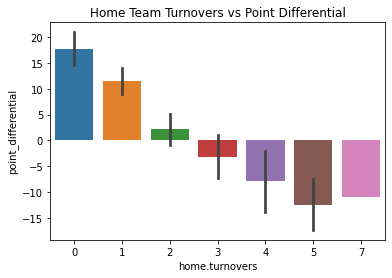

In [29]:
sns.barplot(
    data=combined_data, x="home.turnovers", y="point_differential"
).set_title("Home Team Turnovers vs Point Differential")


Text(0.5, 1.0, 'Away Team Turnovers vs Point Differential')

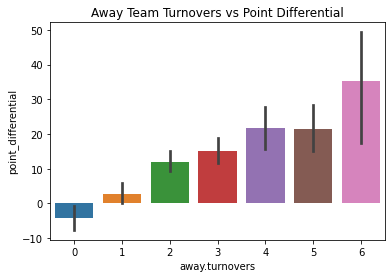

In [30]:
sns.barplot(
    data=combined_data, x="away.turnovers", y="point_differential"
).set_title("Away Team Turnovers vs Point Differential")